# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [166]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [167]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [168]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean()
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 / len(y) * X.T.dot(X.dot(w) - y)
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [169]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [170]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    weights = [w_init]
    for i in range(n_iterations):
        weights.append(weights[i] - lr * loss.calc_grad(X, y, weights[i]))
    return weights

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [171]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [172]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [173]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(30, 18))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    #plt.xlim(w_list[:, 0].min() - 0.1, 
             #w_list[:, 0].max() + 0.1)
    plt.xlim(-1.6, 1.0)
    #plt.ylim(w_list[:, 1].min() - 0.1,
             #w_list[:, 1].max() + 0.1)
    plt.ylim(-1.9, 1.9)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


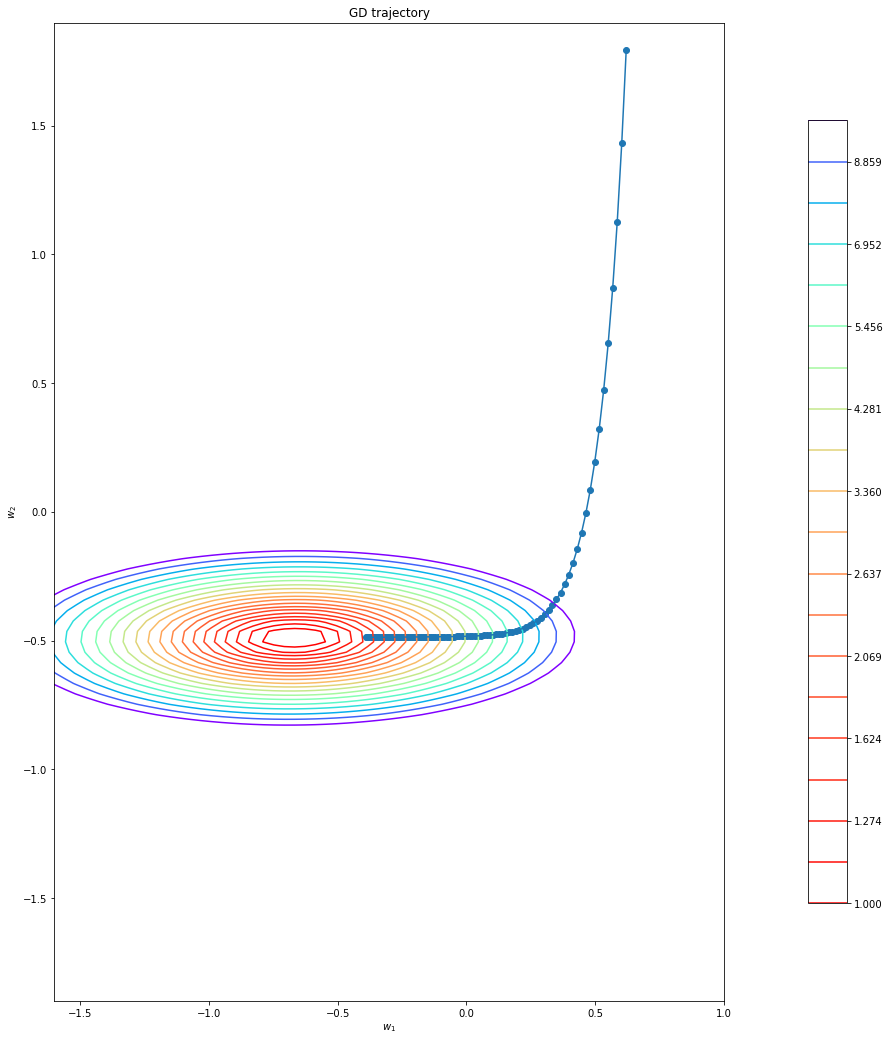

In [174]:
# поменял xlim и ylim в функции выше, чтобы картинки для больших шагов нормальные получались
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.001, 100)
plot_gd(w_list, X, y, loss)

In [175]:
# начал с маленького шага. Медленно, но верно, двигаемся к точке минимума функции потерь. Казалось бы, тише едешь, дальше будешь,
# но с таким маленьким шагом градиентный спуск не успел сойтись за 100 итераций. Попробуем увеличить шаг (уменьшать бесполезно,
# так как тогда тем более не сойдемся)

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


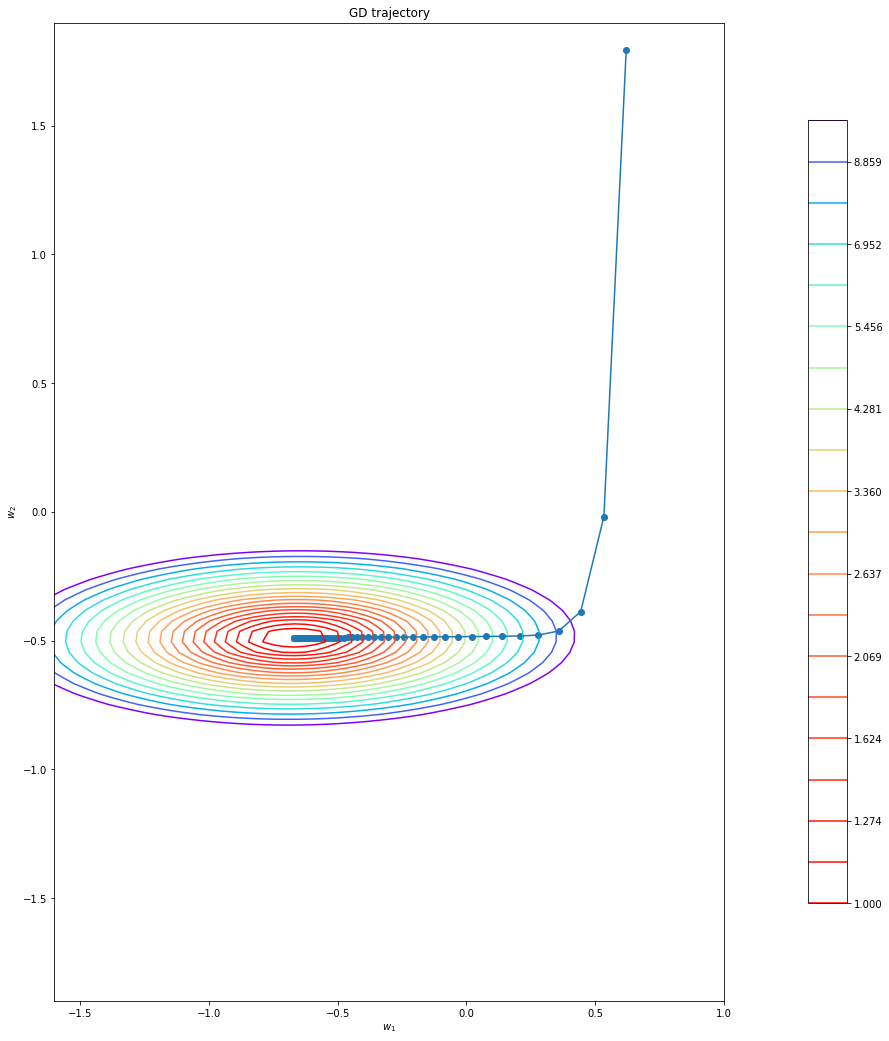

In [176]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.005, 100)
plot_gd(w_list, X, y, loss)

In [177]:
# тут уже картина получше: мы сошлись и двигались довольно плавно, но здесь нам, возможно, повезло с начальной позицией, ибо 
# если бы мы начинали откуда-то подальше, то могли и не успеть сойтись (видно, что потребовалось много шагов)

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


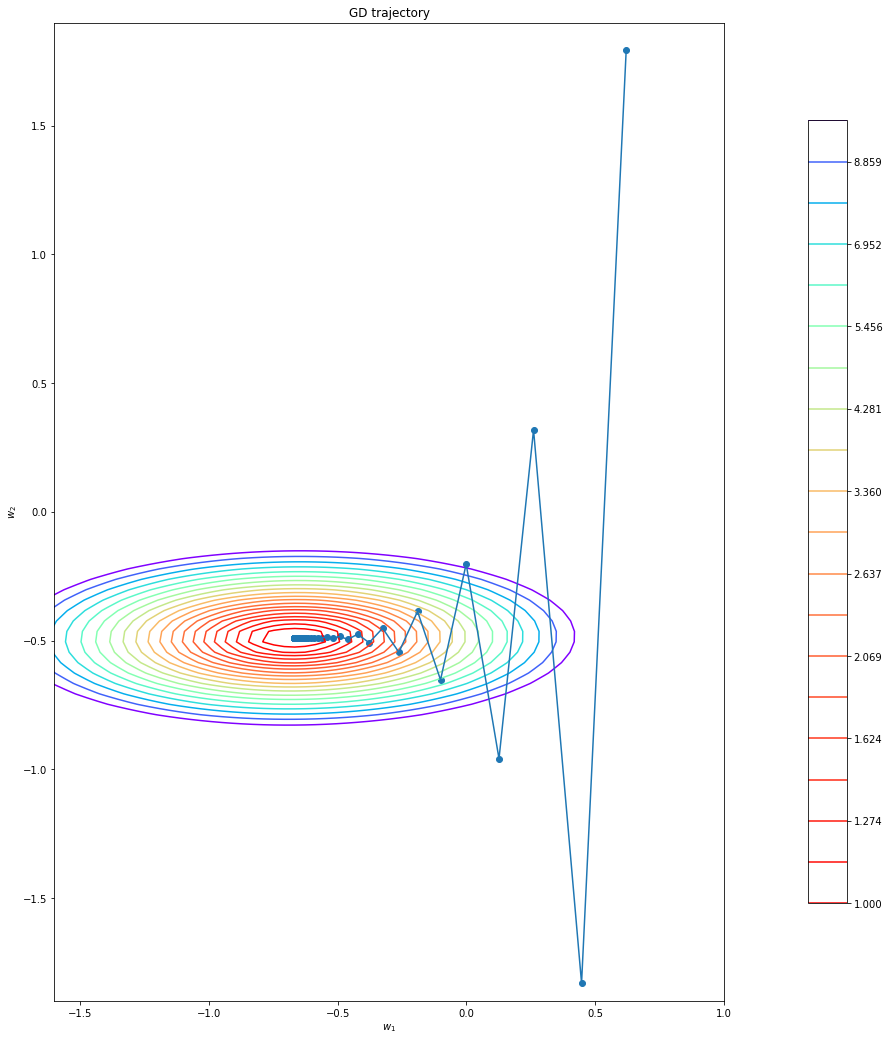

In [178]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
plot_gd(w_list, X, y, loss)

In [179]:
# хоть нас и покалбасило в начале, мы сошлись довольно быстро (быстрее, чем раньше)

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


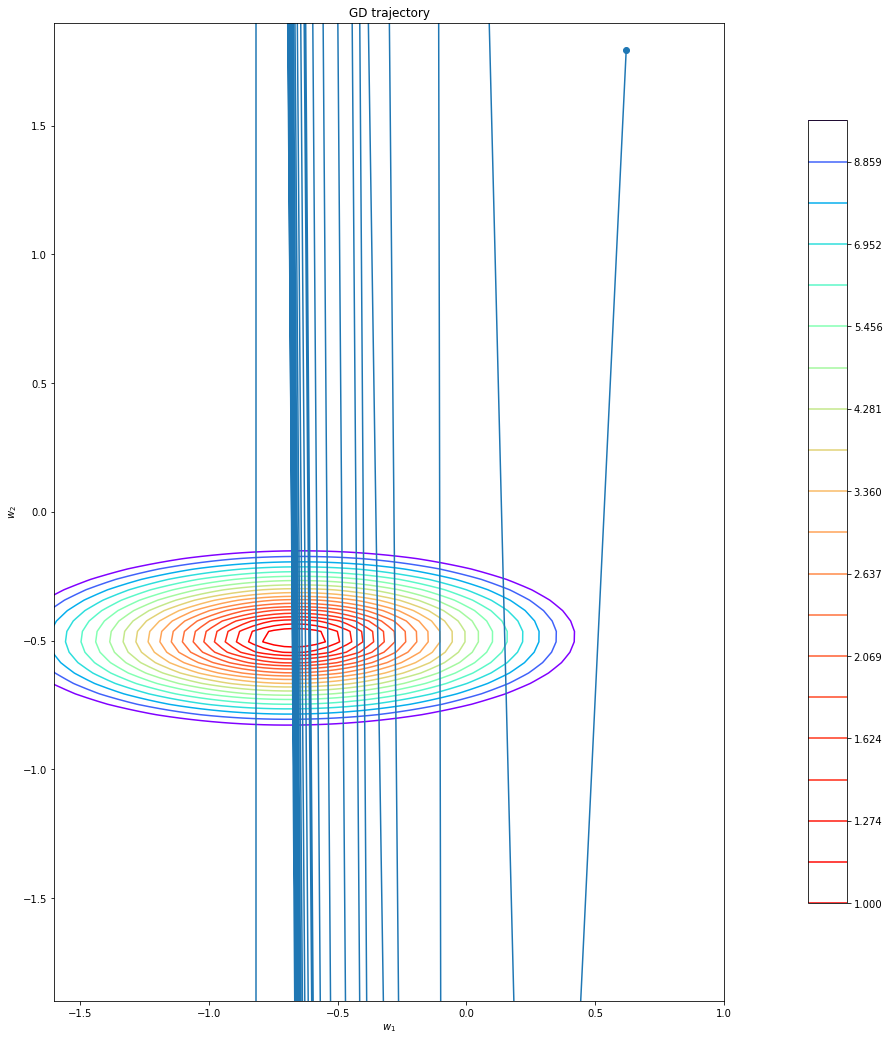

In [180]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.02, 100)
plot_gd(w_list, X, y, loss)

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


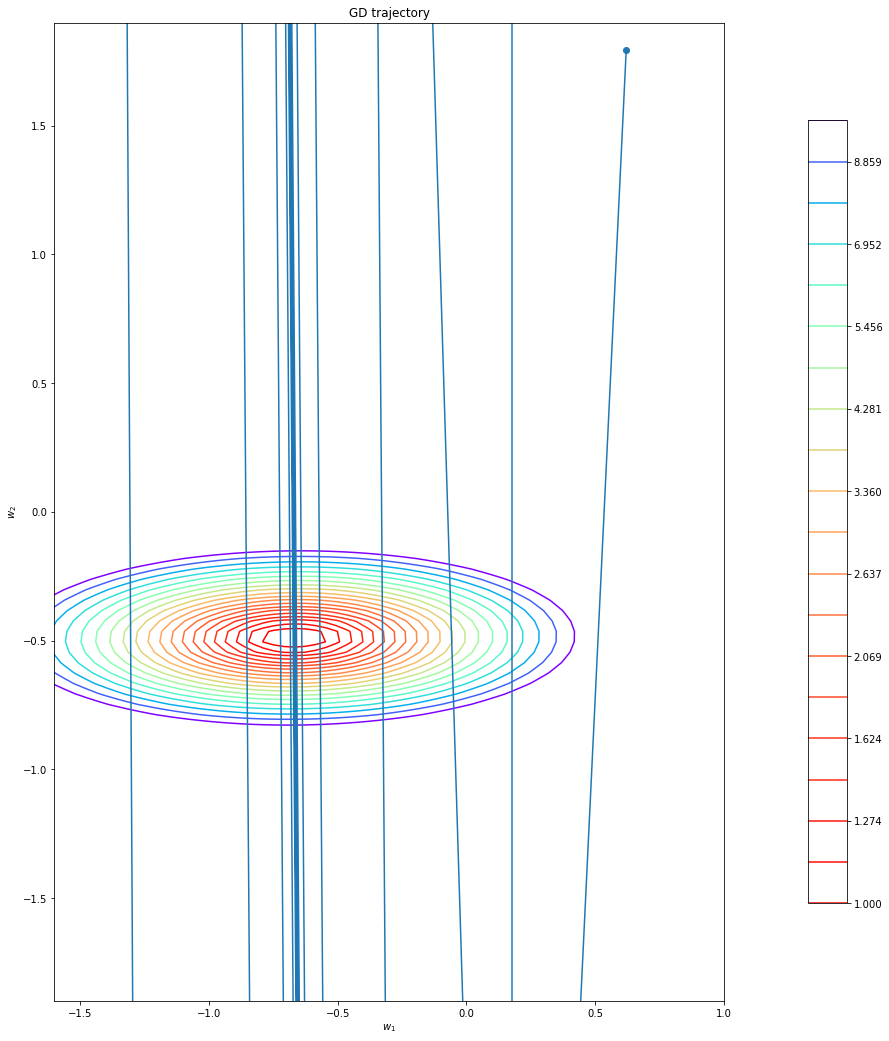

In [181]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.1, 100)
plot_gd(w_list, X, y, loss)

In [182]:
# все, из следующих двух картинок видно, что шаг уже слишком большой и калбасит очень сильно (делаем слишком большие шаги в 
# направлении, обратном к градиенту, и, соответственно, наоборот, увеличиваем ошибку, так как перепрыгиваем через
# минимум)

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [183]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    weights = [w_init]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        weights.append(weights[i] - lr * loss.calc_grad(batch, y[batch_indices], weights[i]))
    return weights

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

In [184]:
# так, ну с тем, как влияет шаг на картинку, мы уже разобрались. Будем для одного и того же шага (0.01, 0.001) 
# варьировать batch_size

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


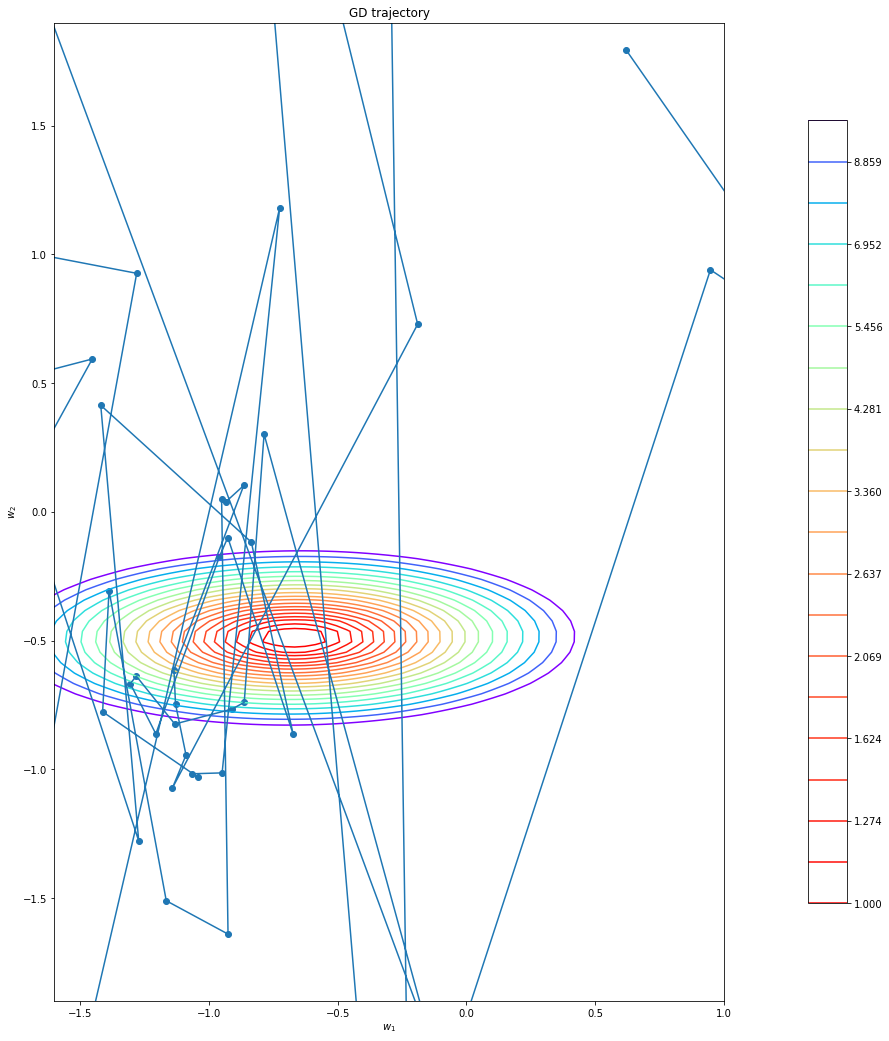

In [185]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 1, 100)
plot_gd(w_list, X, y, loss)

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


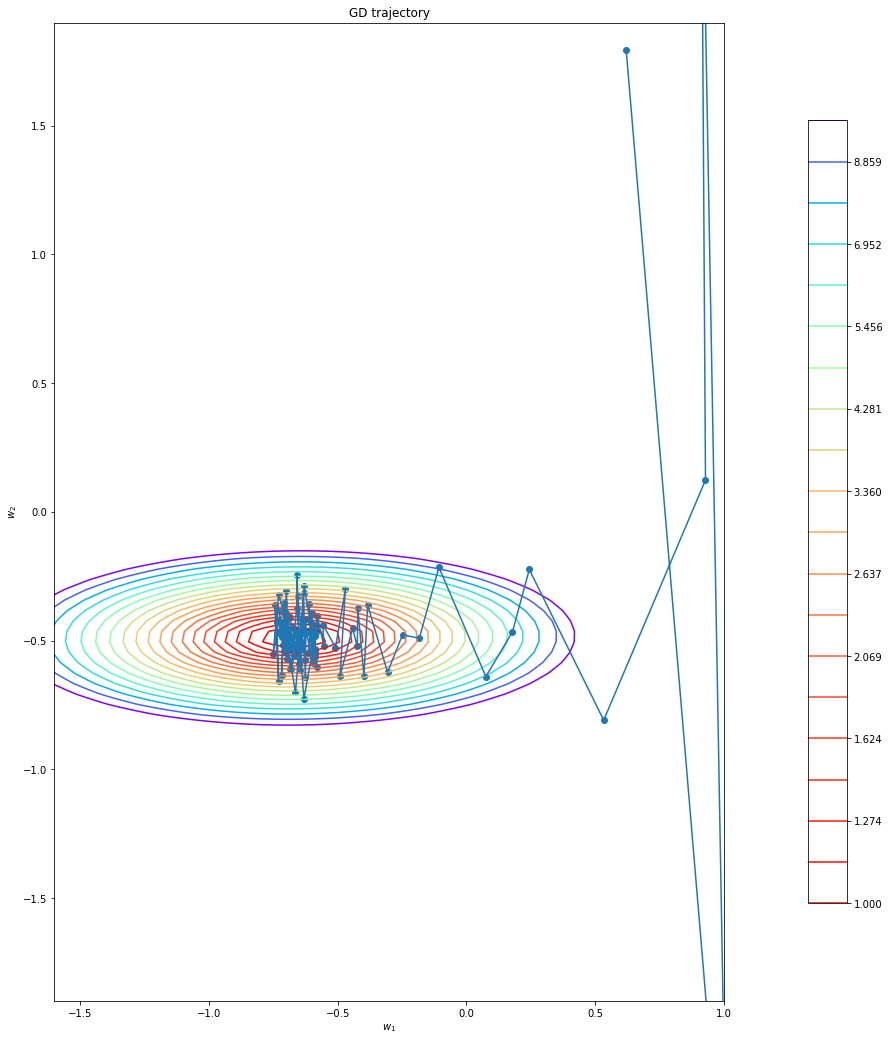

In [186]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 100)
plot_gd(w_list, X, y, loss)

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


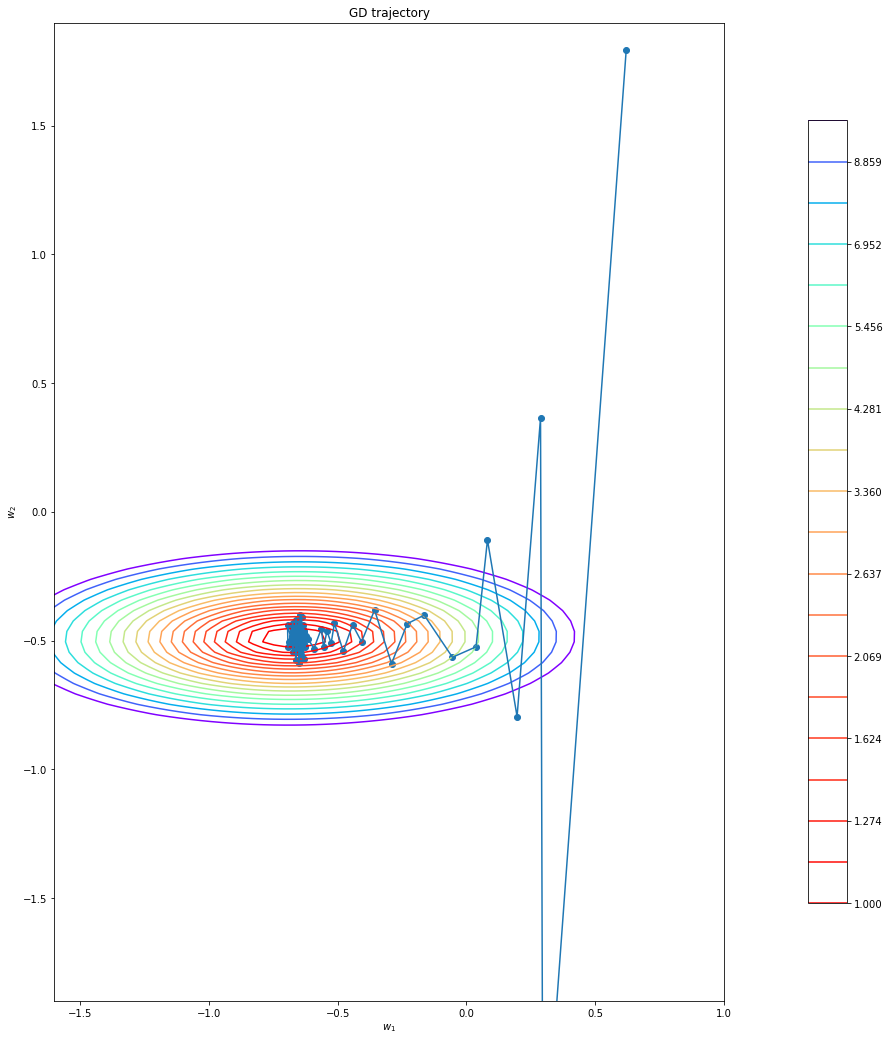

In [187]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 30, 100)
plot_gd(w_list, X, y, loss)

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


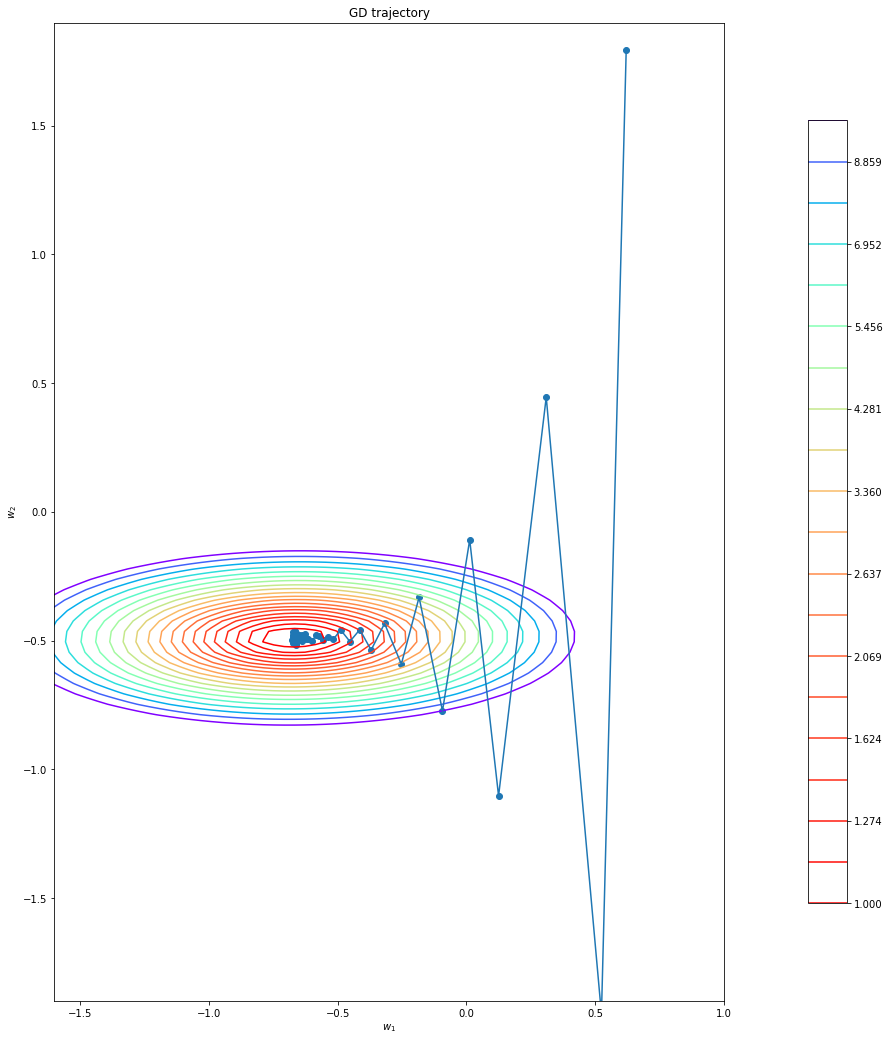

In [188]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 150, 100)
plot_gd(w_list, X, y, loss)

In [189]:
# в случае с batch_size = 1 видим, что размер шага довольно большой, при этом от реального антиградиента мы отклоняемся, так как
# берем всего 1 объект из 300, поэтому происходит такое метание туда-сюда. То есть отклонения от истинного антиградиента 
# довольно существенные, поэтому в комбинации с большим шагом получается полный раскалбас.
# когда размер 150, мы видим, что картинка уже близка к обычному градиентному спуску, так как эти 150 объектов
# уже более менее отражают всю выборку.
# при промежуточных batch_size мы сходимся в район минимума, но там начинаем скакать (перепрыгивать через минимум). Это
# происходит так как там мы находимся близко к минимуму, поэтому при отклонениях от антиградиента, даже небольших, мы перепрыгиваем
# мимо искомой точки, так как шаг большой (поэтому в данном случае и бывает полезно уменьшать шаг с увеличением номера итерации)

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


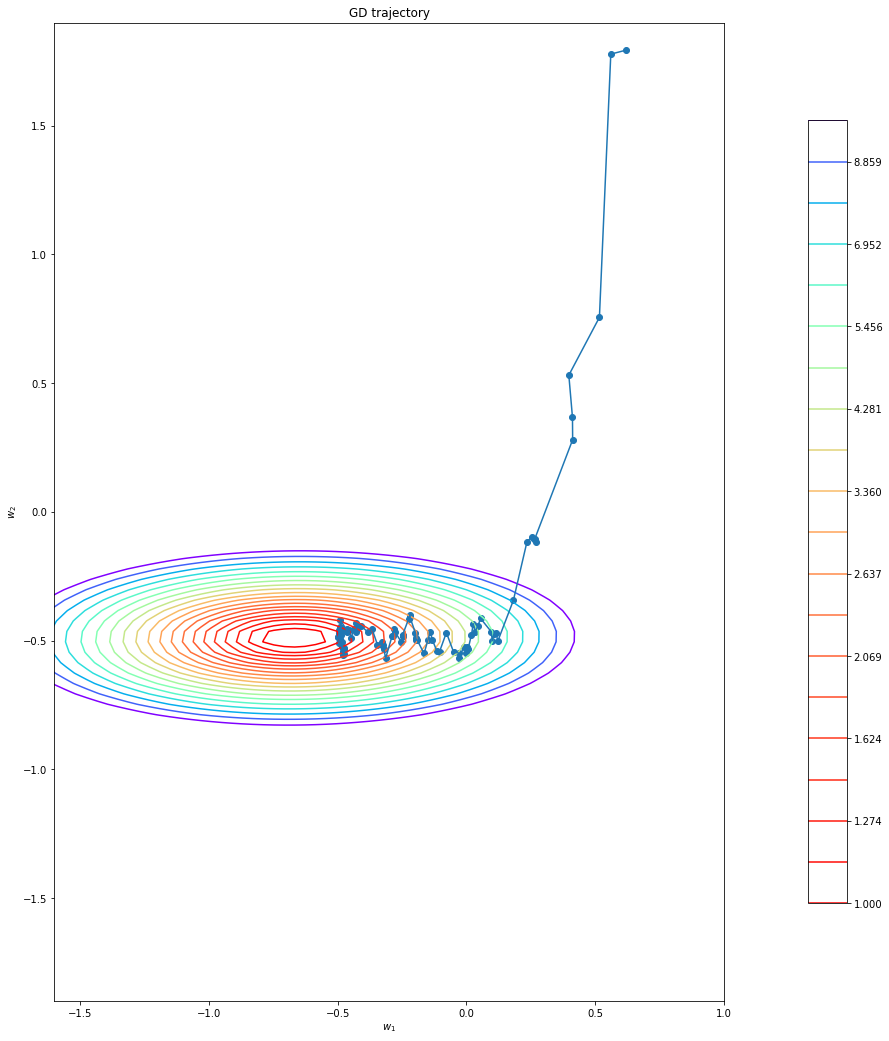

In [191]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.001, 1, 100)
plot_gd(w_list, X, y, loss)

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


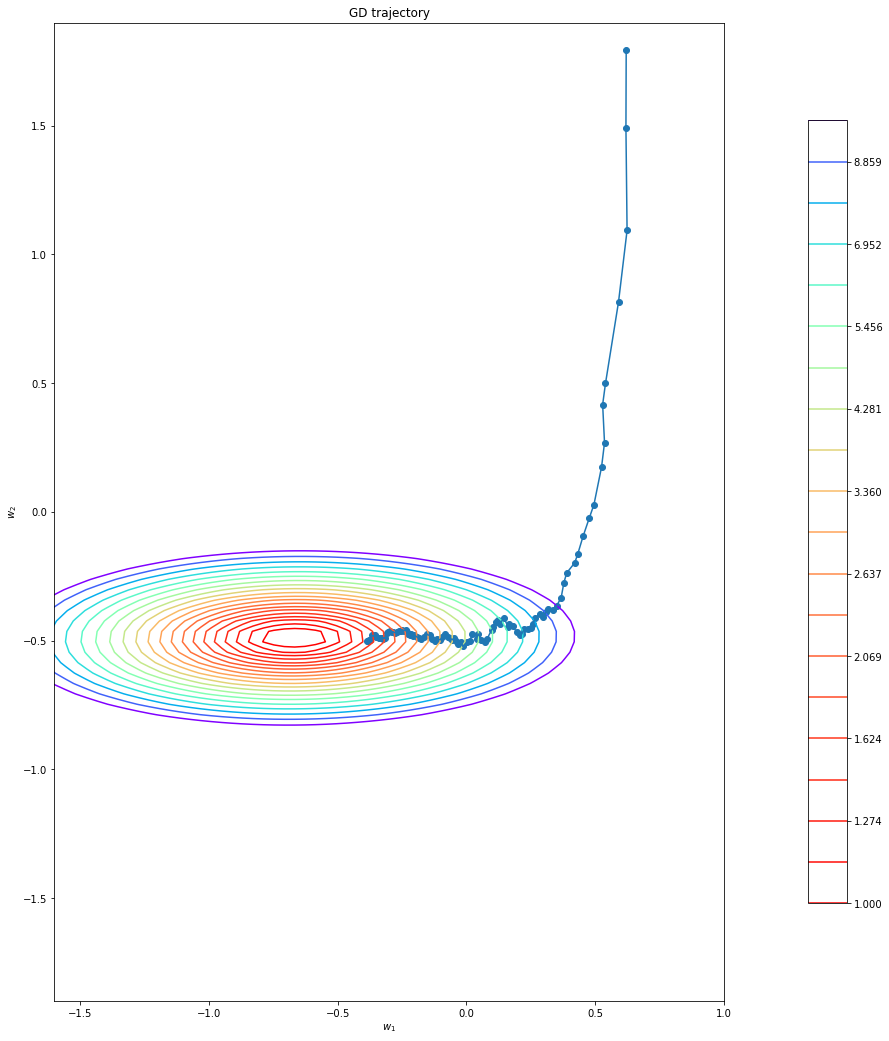

In [192]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.001, 10, 100)
plot_gd(w_list, X, y, loss)

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


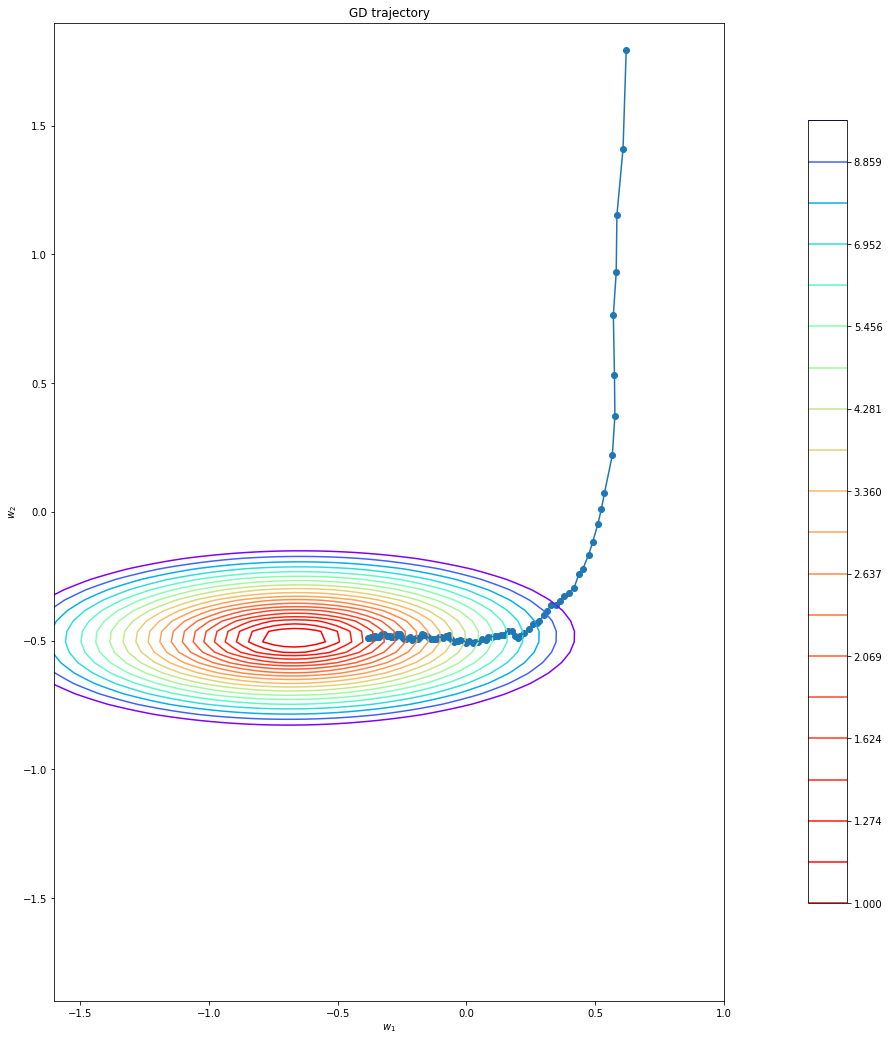

In [193]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.001, 30, 100)
plot_gd(w_list, X, y, loss)

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


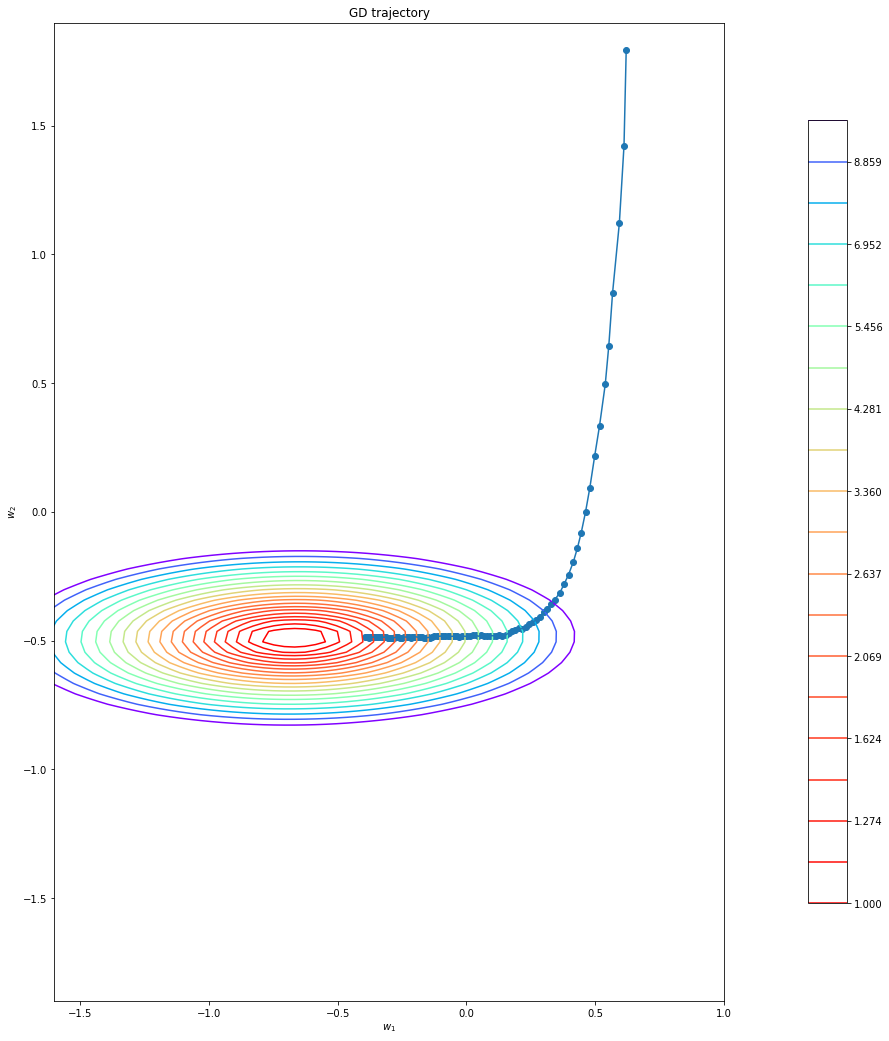

In [194]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.001, 150, 100)
plot_gd(w_list, X, y, loss)

In [195]:
# в целом, тут не надо было рисовать все 4 картинки, потому что и так видно, что при маленьком шаге мы прыгаем вокруг графика 
# обычного градиентного спуска. Чем меньше batch_size, тем больше нас штормит, но мы не улетаем слишком далеко, так как шаг мал

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [196]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    weights = [w_init]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        weights.append(weights[i] - (lr / ((1 + i) ** p)) * loss.calc_grad(batch, y[batch_indices], weights[i]))
    return weights

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


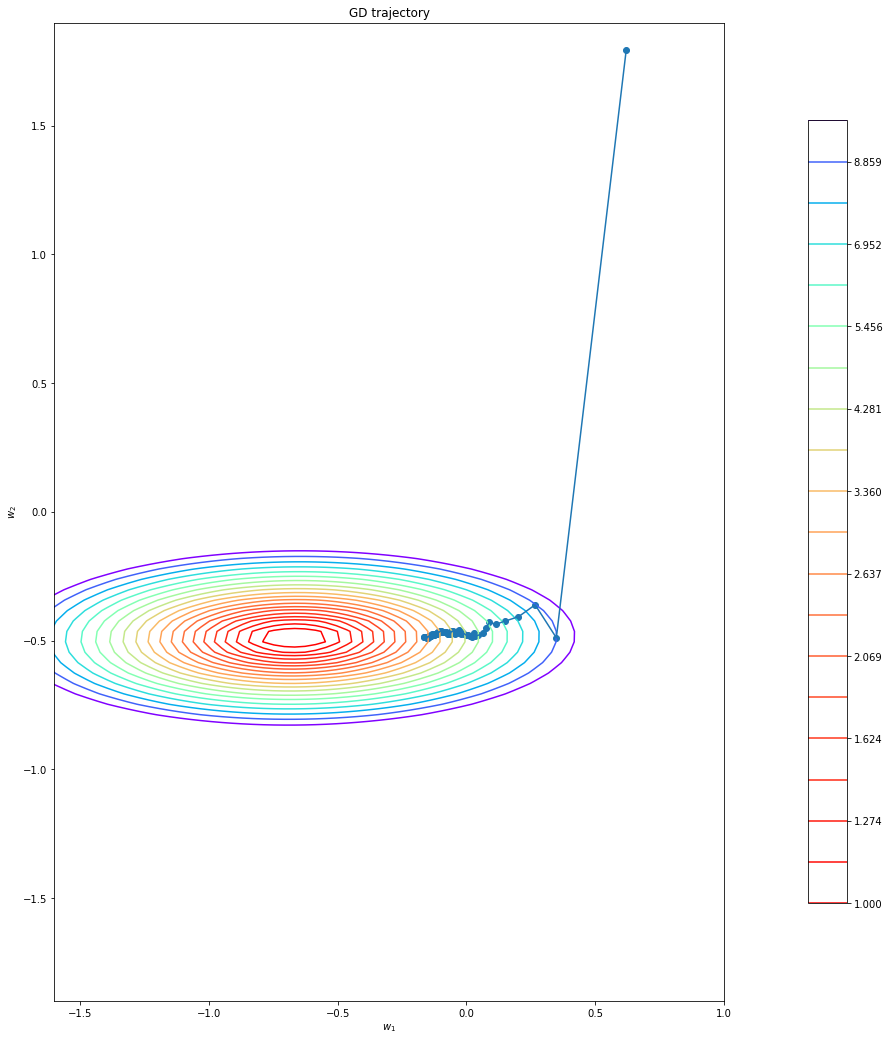

In [202]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 1, 100)
plot_gd(w_list, X, y, loss)

In [203]:
# шаг уменьшается со слишком большой скоростью, поэтому мы просто не успеваем сойтись

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


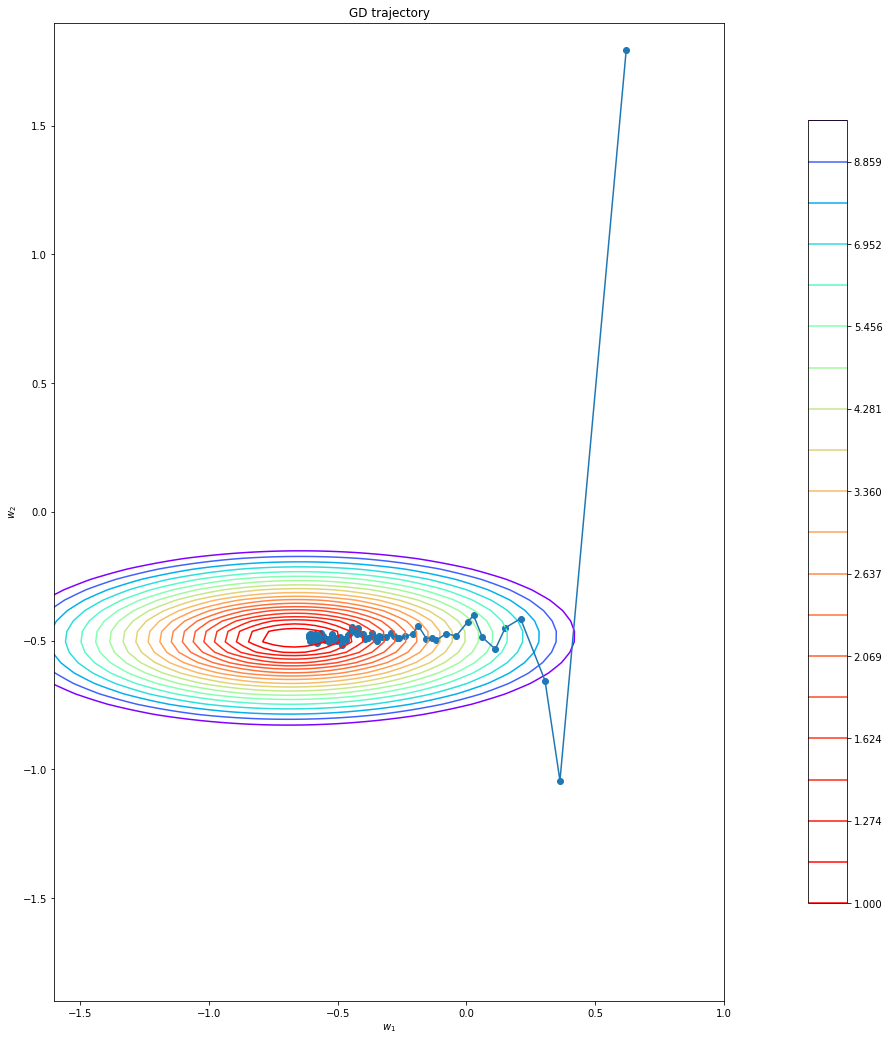

In [204]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.5, 100)
plot_gd(w_list, X, y, loss)

In [205]:
# график становится все плавнее, так как шаг становится меньше, но градиентный спуск все еще не успевает сойтись, попробуем 
# p сделать поменьше

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


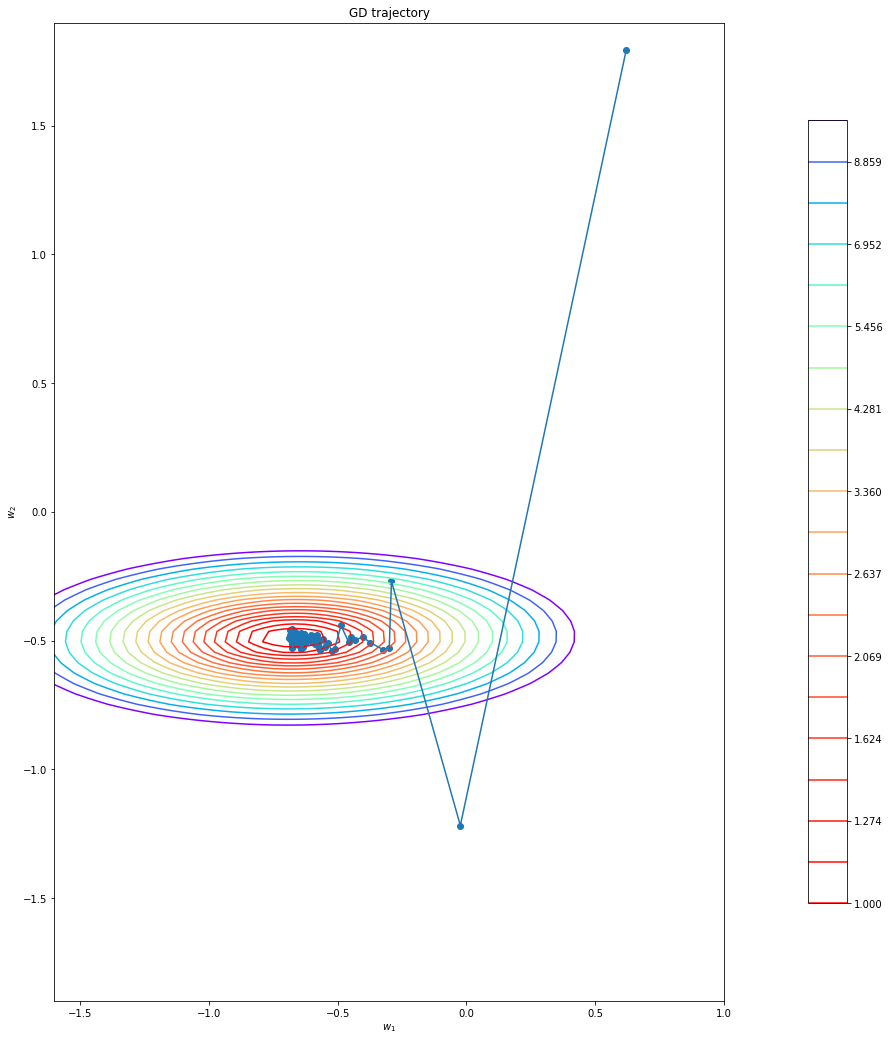

In [206]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.34, 100)
plot_gd(w_list, X, y, loss)

In [207]:
# более менее оптимальное p - успеваем сойтись и при этом наши прыжки вокруг минимума затухают

C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


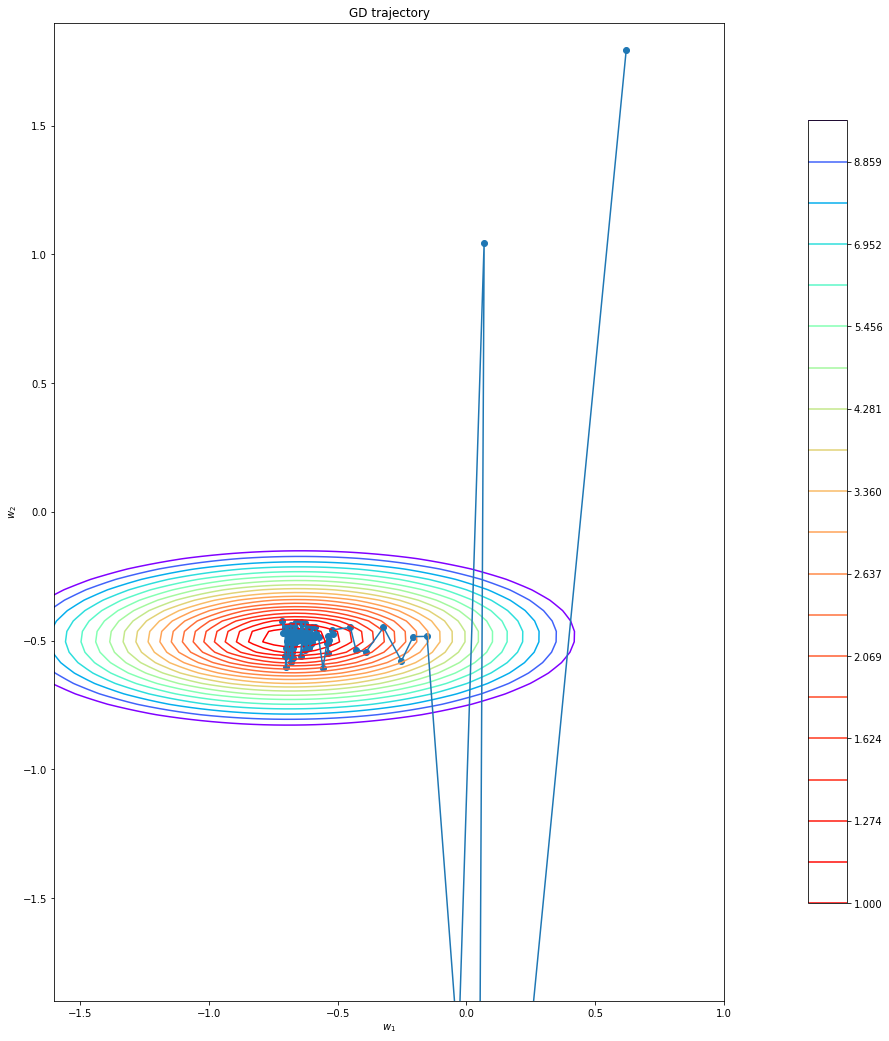

In [208]:
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.1, 100)
plot_gd(w_list, X, y, loss)

In [209]:
# шаг уменьшается мало, поэтому в конце все равно прыгаем вокруг минимума

In [210]:
# итого параметр p нужно подбирать аккуратно: при больших p мы рискуем не сойтись, а при маленьких картинка похожа на обычный
# стохастический градиентный спуск, без регулирования размера шага

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

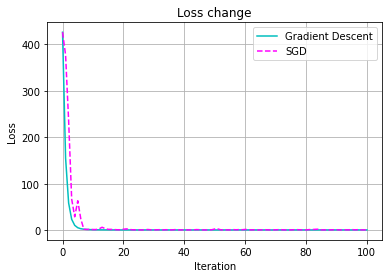

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = MSELoss()
w_list1 = gradient_descent(w_init, X, y, loss, 0.01, 100)
w_list2 = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0, 100)
w_loss1 = np.array(list(map(lambda w: loss.calc_loss(X, y, w), w_list1)))
w_loss2 = np.array(list(map(lambda w: loss.calc_loss(X, y, w), w_list2)))

x = np.arange(0, 101)
plt.plot(x, w_loss1, 'c', linestyle = '-')
plt.plot(x, w_loss2, 'magenta', linestyle = '--')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss change")
plt.legend(['Gradient Descent', 'SGD'])
plt.grid()
plt.show()

In [212]:
# ну, очевидно, что у SGD не будет преимущества, что и видно на графике. Понятно, что если мы идем строго против градиента, то мы
# уменьшаем loss быстрее (на графике loss обычного градиентного спуска уже близок к нулю на пятой итерации, а у SGD - на 10-ой).
# тут мы и не должны были увидеть преимущество SGD, так как здесь не фигурирует нигде время работы, а основной плюс SDG по 
# сравнению с обычным спуском - меньшее время работы

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [553]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_0 = np.random.uniform(-2, 2, (X.shape[1]))
        w_list = gradient_descent(w_0, X, y, self.loss, self.lr, 100)
        self.w = w_list[-1]
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [289]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [290]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [291]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [292]:
X_raw

index  0      1            2       3      4     5            6    7  \
0        0  3    NaN  alfa-romero     gas    std   two  convertible  rwd   
1        1  3    NaN  alfa-romero     gas    std   two  convertible  rwd   
2        2  1    NaN  alfa-romero     gas    std   two    hatchback  rwd   
3        3  2  164.0         audi     gas    std  four        sedan  fwd   
4        4  2  164.0         audi     gas    std  four        sedan  4wd   
..     ... ..    ...          ...     ...    ...   ...          ...  ...   
196    200 -1   95.0        volvo     gas    std  four        sedan  rwd   
197    201 -1   95.0        volvo     gas  turbo  four        sedan  rwd   
198    202 -1   95.0        volvo     gas    std  four        sedan  rwd   
199    203 -1   95.0        volvo  diesel  turbo  four        sedan  rwd   
200    204 -1   95.0        volvo     gas  turbo  four        sedan  rwd   

         8  ...    15   16    17    18    19    20     21      22  23  24  
0    front  ...  four  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  
1    front  ...  four  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  
2    front  ...   six  152  mpfi  2.68  3.47   9.0  154.0  5000.0  19  26  
3    front  ...  four  109  mpfi  3.19  3.40  10.0  102.0  5500.0  24  30  
4    front  ...  five  136  mpfi  3.19  3.40   8.0  115.0  5500.0  18  22  
..     ...  ...   ...  ...   ...   ...   ...   ...    ...     ...  ..  ..  
196  front  ...  four  141  mpfi  3.78  3.15   9.5  114.0  5400.0  23  28  
197  front  ...  four  141  mpfi  3.78  3.15   8.7  160.0  5300.0  19  25  
198  front  ...   six  173  mpfi  3.58  2.87   8.8  134.0  5500.0  18  23  
199  front  ...   six  145   idi  3.01  3.40  23.0  106.0  4800.0  26  27  
200  front  ...  four  141  mpfi  3.78  3.15   9.5  114.0  5400.0  19  25  

[201 rows x 26 columns]

In [293]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: 25, Length: 201, dtype: float64

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [294]:
X_raw.isnull().sum().sum() # столько пропущенных значений

51

In [295]:
from sklearn.impute import SimpleImputer

# для вещественнозначных признаков заполним пропуски средними
cat_features_mask = (X_raw.dtypes == "object").values
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)
X_no_mis_real

index    0      1      9     10    11    12      13     16    18    19  \
0      0.0  3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68   
1      1.0  3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68   
2      2.0  1.0  122.0   94.5  171.2  65.5  52.4  2823.0  152.0  2.68  3.47   
3      3.0  2.0  164.0   99.8  176.6  66.2  54.3  2337.0  109.0  3.19  3.40   
4      4.0  2.0  164.0   99.4  176.6  66.4  54.3  2824.0  136.0  3.19  3.40   
..     ...  ...    ...    ...    ...   ...   ...     ...    ...   ...   ...   
196  200.0 -1.0   95.0  109.1  188.8  68.9  55.5  2952.0  141.0  3.78  3.15   
197  201.0 -1.0   95.0  109.1  188.8  68.8  55.5  3049.0  141.0  3.78  3.15   
198  202.0 -1.0   95.0  109.1  188.8  68.9  55.5  3012.0  173.0  3.58  2.87   
199  203.0 -1.0   95.0  109.1  188.8  68.9  55.5  3217.0  145.0  3.01  3.40   
200  204.0 -1.0   95.0  109.1  188.8  68.9  55.5  3062.0  141.0  3.78  3.15   

       20     21      22    23    24  
0     9.0  111.0  5000.0  21.0  27.0  
1     9.0  111.0  5000.0  21.0  27.0  
2     9.0  154.0  5000.0  19.0  26.0  
3    10.0  102.0  5500.0  24.0  30.0  
4     8.0  115.0  5500.0  18.0  22.0  
..    ...    ...     ...   ...   ...  
196   9.5  114.0  5400.0  23.0  28.0  
197   8.7  160.0  5300.0  19.0  25.0  
198   8.8  134.0  5500.0  18.0  23.0  
199  23.0  106.0  4800.0  26.0  27.0  
200   9.5  114.0  5400.0  19.0  25.0  

[201 rows x 16 columns]

In [296]:
# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)
X_no_mis.head()

index    0      1     9     10    11    12      13     16    18  ...  \
0    0.0  3.0  122.0  88.6  168.8  64.1  48.8  2548.0  130.0  3.47  ...   
1    1.0  3.0  122.0  88.6  168.8  64.1  48.8  2548.0  130.0  3.47  ...   
2    2.0  1.0  122.0  94.5  171.2  65.5  52.4  2823.0  152.0  2.68  ...   
3    3.0  2.0  164.0  99.8  176.6  66.2  54.3  2337.0  109.0  3.19  ...   
4    4.0  2.0  164.0  99.4  176.6  66.4  54.3  2824.0  136.0  3.19  ...   

             2    3    4     5            6    7      8    14    15    17  
0  alfa-romero  gas  std   two  convertible  rwd  front  dohc  four  mpfi  
1  alfa-romero  gas  std   two  convertible  rwd  front  dohc  four  mpfi  
2  alfa-romero  gas  std   two    hatchback  rwd  front  ohcv   six  mpfi  
3         audi  gas  std  four        sedan  fwd  front   ohc  four  mpfi  
4         audi  gas  std  four        sedan  4wd  front   ohc  five  mpfi  

[5 rows x 26 columns]

In [297]:
X_no_mis.isnull().sum().sum() # больше нет пропущенных значений

0

In [298]:
# кодируем категориальные переменные
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
print(X_dum.shape)
X_dum.head()

(201, 66)


index    0      1     9     10    11    12      13     16    18  ...  \
0    0.0  3.0  122.0  88.6  168.8  64.1  48.8  2548.0  130.0  3.47  ...   
1    1.0  3.0  122.0  88.6  168.8  64.1  48.8  2548.0  130.0  3.47  ...   
2    2.0  1.0  122.0  94.5  171.2  65.5  52.4  2823.0  152.0  2.68  ...   
3    3.0  2.0  164.0  99.8  176.6  66.2  54.3  2337.0  109.0  3.19  ...   
4    4.0  2.0  164.0  99.4  176.6  66.4  54.3  2824.0  136.0  3.19  ...   

   15_three  15_twelve  15_two  17_2bbl  17_4bbl  17_idi  17_mfi  17_mpfi  \
0         0          0       0        0        0       0       0        1   
1         0          0       0        0        0       0       0        1   
2         0          0       0        0        0       0       0        1   
3         0          0       0        0        0       0       0        1   
4         0          0       0        0        0       0       0        1   

   17_spdi  17_spfi  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0  

[5 rows x 66 columns]

In [299]:
# нормируем данные
from sklearn.preprocessing import StandardScaler, MinMaxScaler

normalizer = MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data=X_real_norm_np)

X = X.drop(0, axis=1) # нам же не нужен бесполезный признак 'index'
X.head()

1         2         3         4         5         6         7         8   \
0  1.0  0.298429  0.058309  0.413433  0.324786  0.083333  0.411171  0.260377   
1  1.0  0.298429  0.058309  0.413433  0.324786  0.083333  0.411171  0.260377   
2  0.6  0.298429  0.230321  0.449254  0.444444  0.383333  0.517843  0.343396   
3  0.8  0.518325  0.384840  0.529851  0.504274  0.541667  0.329325  0.181132   
4  0.8  0.518325  0.373178  0.529851  0.521368  0.541667  0.518231  0.283019   

         9         10  ...   56   57   58   59   60   61   62   63   64   65  
0  0.664286  0.290476  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1  0.664286  0.290476  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2  0.100000  0.666667  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
3  0.464286  0.633333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4  0.464286  0.633333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  

[5 rows x 65 columns]

In [449]:
# разделяем на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split

np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [450]:
X_train.shape

(150, 65)

In [451]:
X_test.shape

(51, 65)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [539]:
linear_regression = LinearRegression(MSELoss())
linear_regression.fit(X_train,y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [540]:
from sklearn.metrics import mean_squared_error

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 6073456.635309715
Test: 8025766.558876399


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [555]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean() + self.coef * np.sum(w[:-1] ** 2)
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w[-1] = 0
        return 2 / len(y) * X.T.dot(X.dot(w) - y) + 2 * self.coef * w
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [556]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [557]:
# выборка у нас небольшая, сделаем кросс-валидацию
from sklearn.model_selection import KFold

lambdas = [1e-3, 1e-1, 1, 10, 100]

kf = KFold(n_splits = 5)
errors = []

for a in lambdas:
    errors_for_lambdas = []
    for train_index, test_index in kf.split(X_train):
        X_train_train, X_train_val = np.array(X_train)[train_index], np.array(X_train)[test_index]
        y_train_train, y_train_val = np.array(y_train)[train_index], np.array(y_train)[test_index]
        linear_regression = LinearRegression(MSEL2Loss(a))
        linear_regression.fit(X_train_train, y_train_train)
        errors_for_lambdas.append(mean_squared_error(y_train_val, linear_regression.predict(X_train_val)))
    errors.append(np.mean(errors_for_lambdas))

errors

[9385124.49003219,
 13373605.997834232,
 35892196.13457395,
 7.272159859338974e+78,
 1.5039539347024663e+267]

In [558]:
# видим, что lambda в районе 0.001 дает самый хороший результат. Попробуем более точно определить оптимальный коэффициент

In [559]:
lambdas = list(np.arange(0, 0.002, 0.0001))

kf = KFold(n_splits = 5)
errors = []

for a in lambdas:
    errors_for_lambdas = []
    for train_index, test_index in kf.split(X_train):
        X_train_train, X_train_val = np.array(X_train)[train_index], np.array(X_train)[test_index]
        y_train_train, y_train_val = np.array(y_train)[train_index], np.array(y_train)[test_index]
        linear_regression = LinearRegression(MSEL2Loss(a))
        linear_regression.fit(X_train_train, y_train_train)
        errors_for_lambdas.append(mean_squared_error(y_train_val, linear_regression.predict(X_train_val)))
    errors.append(np.mean(errors_for_lambdas))

errors

[9354638.606100956,
 9358321.247269515,
 9360672.532704866,
 9364356.12240379,
 9367820.087322589,
 9370119.80386685,
 9372237.113812739,
 9376556.709984267,
 9378925.693383442,
 9381887.758236751,
 9385812.91246714,
 9388607.63036162,
 9391279.303343521,
 9394893.07218257,
 9397222.342641484,
 9400049.731422264,
 9402880.195349842,
 9406648.67918603,
 9410407.622598711,
 9413972.90497229]

In [545]:
# в общем что-то пошло не так и никакой положительный коэффициент не дает результат лучше...

In [546]:
linear_regression = LinearRegression(MSEL2Loss(0.001))
linear_regression.fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 6107882.255136078
Test: 8041015.610941621


In [461]:
# попробуем выяснить в чем проблема. Для начала построим гистограммы целевой переменной на трейне и на тесте - близки ли они?

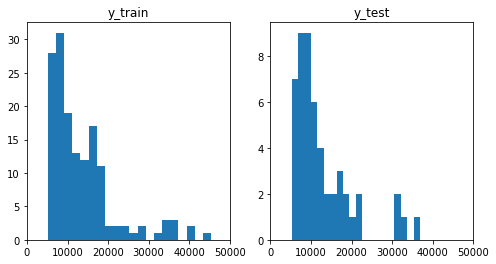

In [462]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
n_bins = 20
axs[0].hist(y_train, bins=n_bins)
axs[0].set_xlim(0, 50000)
axs[0].set_title('y_train')
axs[1].hist(y_test, bins=n_bins)
axs[1].set_xlim(0, 50000)
axs[1].set_title('y_test')
plt.show()

In [ ]:
# вроде относительно нормально получилось, разделение не сильно скошенное

In [ ]:
# тогда попробуем посторить диаграммы рассеяния признаков против целевой переменной на трейне и на тесте

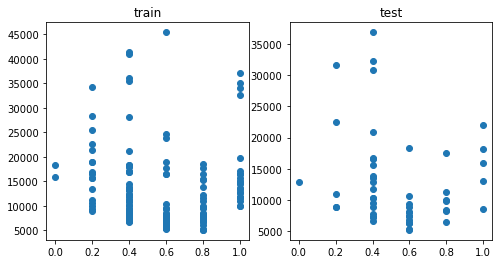

In [469]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].scatter(X_train[1], y_train)
axs[0].set_title('train')
axs[1].scatter(X_test[1], y_test)
axs[1].set_title('test')
plt.show()

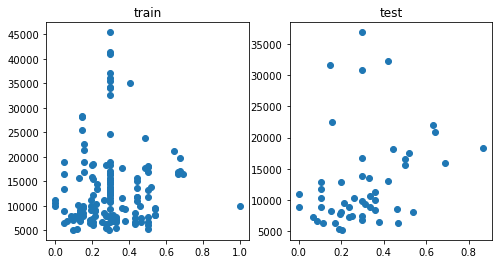

In [470]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].scatter(X_train[2], y_train)
axs[0].set_title('train')
axs[1].scatter(X_test[2], y_test)
axs[1].set_title('test')
plt.show()

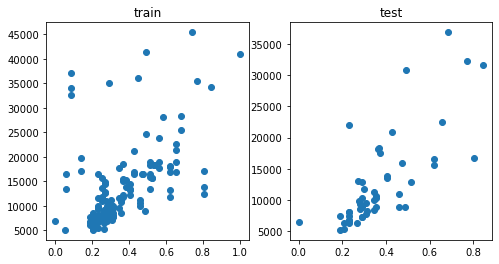

In [471]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].scatter(X_train[3], y_train)
axs[0].set_title('train')
axs[1].scatter(X_test[3], y_test)
axs[1].set_title('test')
plt.show()

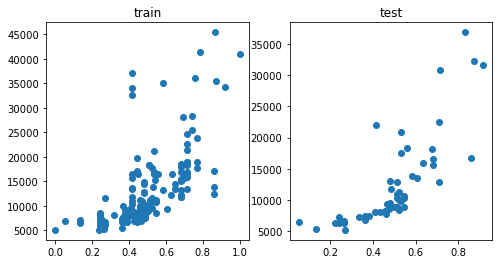

In [472]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].scatter(X_train[4], y_train)
axs[0].set_title('train')
axs[1].scatter(X_test[4], y_test)
axs[1].set_title('test')
plt.show()

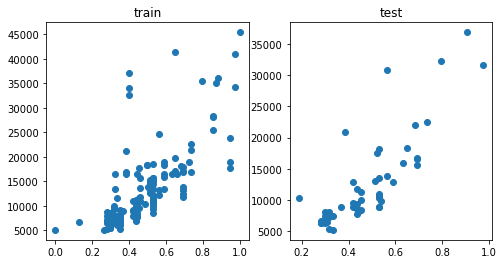

In [473]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].scatter(X_train[5], y_train)
axs[0].set_title('train')
axs[1].scatter(X_test[5], y_test)
axs[1].set_title('test')
plt.show()

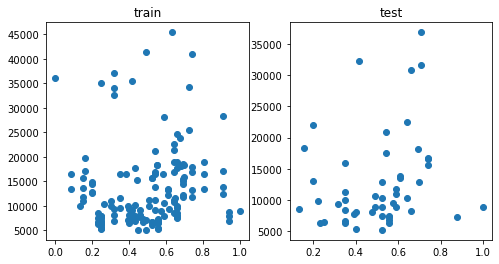

In [474]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].scatter(X_train[6], y_train)
axs[0].set_title('train')
axs[1].scatter(X_test[6], y_test)
axs[1].set_title('test')
plt.show()

In [ ]:
# тоже нет неожиданных аномалий

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [547]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        return np.array(list(map(lambda z: (-self.eps < z < self.eps and z ** 2 / 2 or 
                                                    self.eps * (np.abs(z) - self.eps / 2)), X.dot(w) - y))).mean()
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return np.array(list(map(lambda x: x.sum(), np.array(X.T * (list(map(lambda z: (-self.eps < z < self.eps and z or 
                                                    self.eps * np.sign(z)), X.dot(w) - y))))))).T / len(y)
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

In [548]:
h = HuberLoss(146474657)
h.calc_loss(X,y,np.arange(0,130,2)) * 2

217611675.3757287

In [549]:
h1 = MSELoss()
h1.calc_loss(X,y,np.arange(0,130,2))

217611675.37572873

In [550]:
# вроде loss написан верно, так как при большом eps (2 * HuberLoss ~ MSELoss)

In [563]:
a = np.array([[0, 1], [2, 3]])
b = np.array([1, 4])
c = np.array([3, 6])
h.calc_grad(a, b, c)

array([20. , 32.5])

In [ ]:
# это проверка градиента. Посчитал ручками, все сошлось

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [569]:
linear_regression = LinearRegression(HuberLoss(10))
linear_regression.fit(X_train,y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 225855410.24532154
Test: 197289813.74344122


In [565]:
linear_regression = LinearRegression(MSELoss())
linear_regression.fit(X_train,y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 6064700.389239826
Test: 8024937.570733463


In [ ]:
# Huber выдает ошибку на тесте больше, чем на на трейне. Возможно, проблема в том, что в трейне больших данных, чем в тесте, а
# дадасет у нас небольшой

In [ ]:
# сравнивая по абсолютным значениям mean_squared_error, видим, что HuberLoss значительно хуже

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [ ]:
# слушай, а ловко ты это придумал, я даже сначала не понял

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [650]:
def annealing(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, T_init: float = 1000, T_min: float = 10, k_iterations: int = 100) -> List[np.ndarray]:
    # T_init - начальная температура
    # T_min - минимальное значение температуры
    # k_iterations - количесвто итераций во внутренней циркуляции
    w = [w_init]
    T = T_init
    t = 0
    while T >= T_min:
        for i in range(k_iterations):
            Y = loss.calc_loss(X, y, w[-1]) 
            new_w = w[-1] + np.random.standard_t(3, size=w[-1].shape)
            yNew = loss.calc_loss(X, y, new_w) 
            if yNew - Y < 0:
                w.append(new_w)
            else:
                # принцип метрополиса
                p = np.exp(-(yNew - Y) / T)
                r = np.random.uniform(low = 0,high = 1)
                if r < p:
                    w.append(new_w)
        t += 1
        T = T_init/ (1 + t) # можно сделать T = T_init/ np.log(1 + t), но тогда долго работает
    return w

In [651]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [652]:
# отжиг
loss = MSELoss()
w_list = annealing(w_init, X, y, loss)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
1.0842864246167938


In [620]:
# градиентный спуск
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [621]:
# итого отжиг тоже неплохо работает (судя по значению лосса в конце)

0.9421059144013869


C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


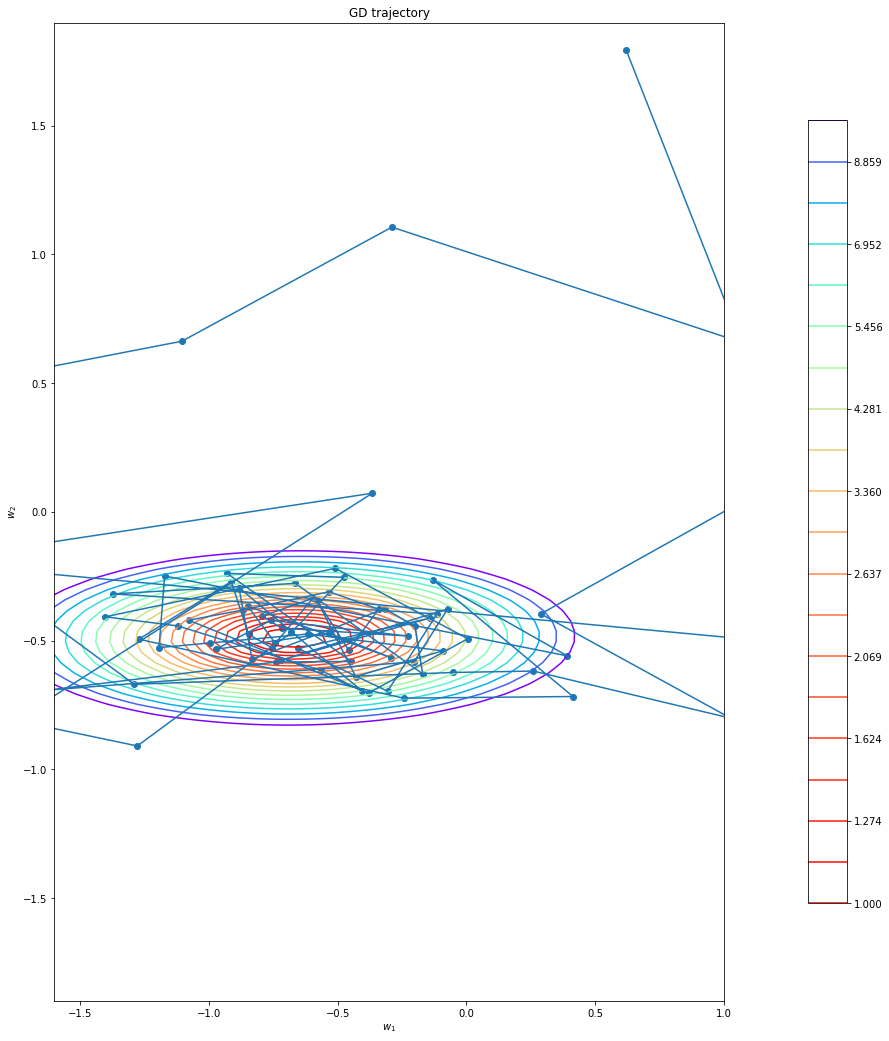

In [659]:
loss = MSELoss()
w_list = annealing(w_init, X, y, loss, 1000, 1, 1)
print(loss.calc_loss(X, y, w_list[-1]))
plot_gd(w_list, X, y, loss)

In [ ]:
# в конце, мы, кажется, тусуемся в нужном месте - близко к минимуму. Это происходит отчасти из-за того, что здесь T_min довольно
# маленькое. А это значит, что в конце у нас уже гораздо меньше рандома и мы не улетаем из зоны минимума (чем меньше текущая
# температура, тем меньше рандома, и тем меньше мы оклоняемся)

3.373968593723653


C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


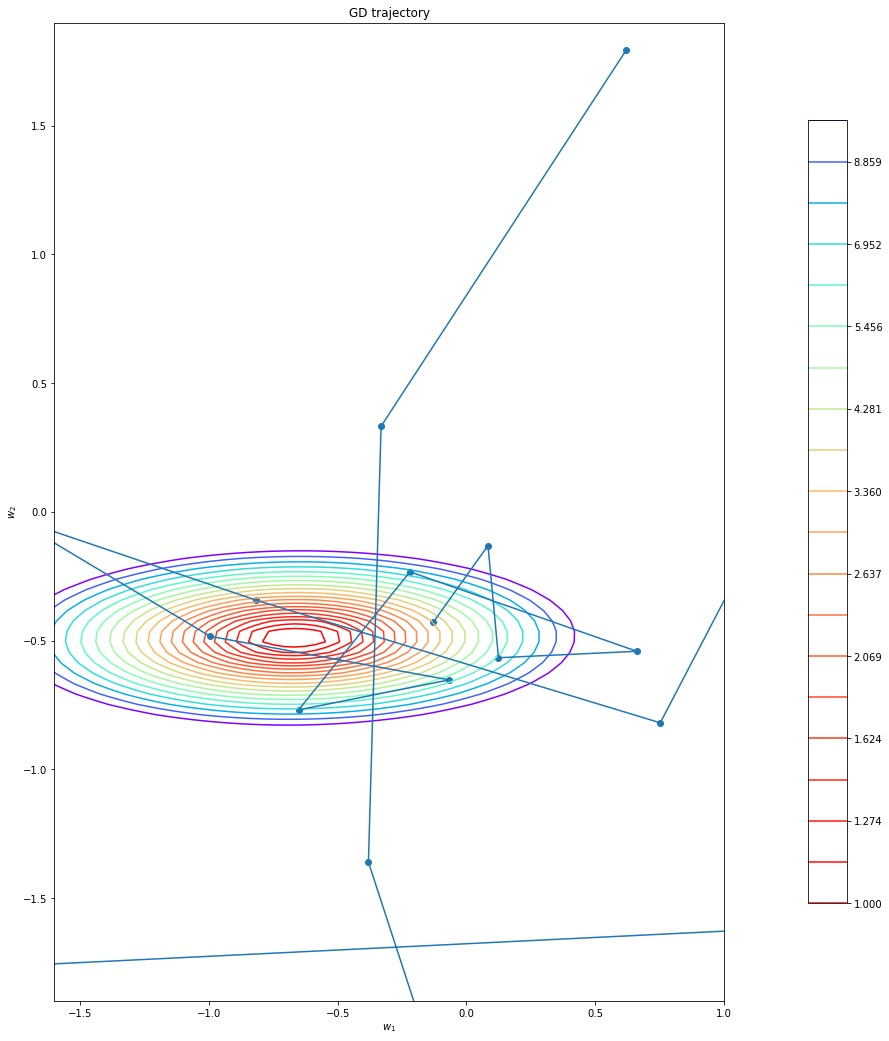

In [660]:
loss = MSELoss()
w_list = annealing(w_init, X, y, loss, 1000, 10, 1)
print(loss.calc_loss(X, y, w_list[-1]))
plot_gd(w_list, X, y, loss)

In [ ]:
# просто пример посмотреть для маленького количества итераций

1.5396994336424341


C:\Users\73F5~1\AppData\Local\Temp/ipykernel_19500/3035351691.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


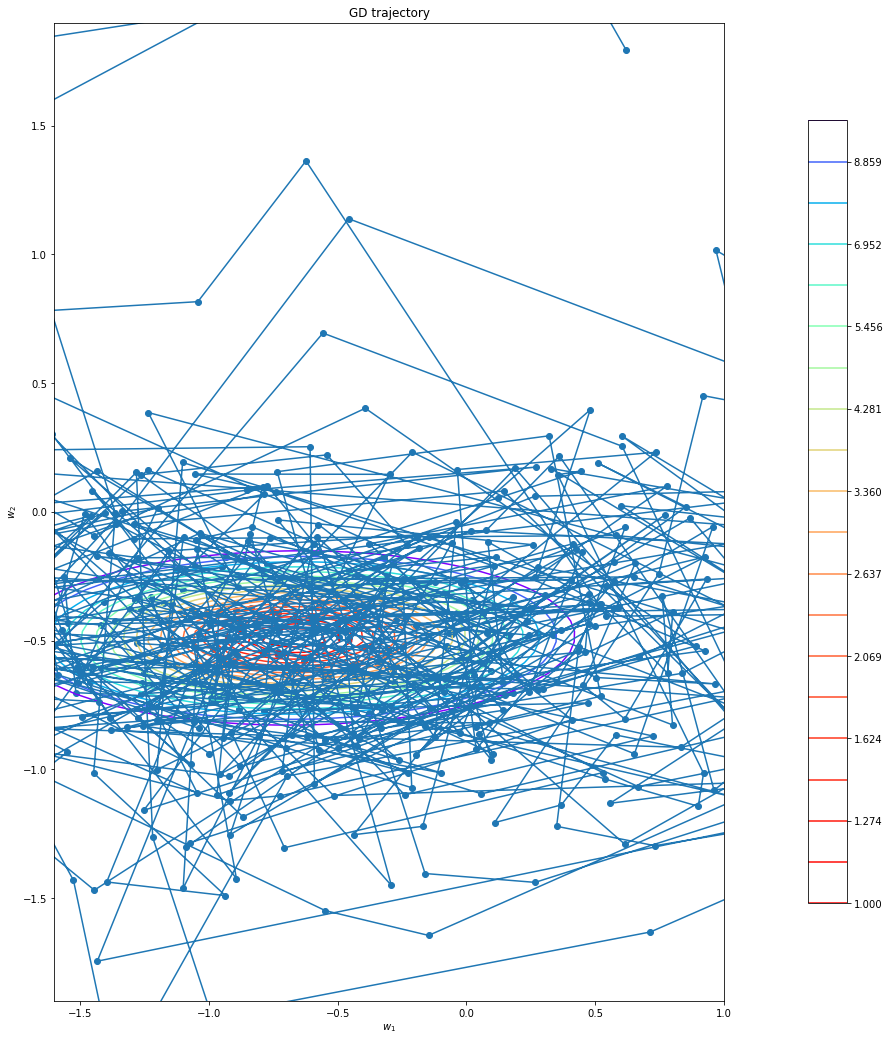

In [662]:
loss = MSELoss()
w_list = annealing(w_init, X, y, loss, 1000, 10, 20)
print(loss.calc_loss(X, y, w_list[-1]))
plot_gd(w_list, X, y, loss)

In [654]:
# в общем, из-за наличия некоторого рандома, для получения хорошего результата логичнее использовать много итераций, но тогда 
# на картинке совсем ничего не видно. Иногда мы двигаемся в сторону уменьшения ошибки, но также бывает, что мы продвигаемся
# в рандомную сторону

In [ ]:
# я бы сказал, что градиентный спуск все-таки надежнее и эффективнее, а иногда даже и быстрее, так как тут мы явно делаем очень
# много итераций. Тем более для градиентного спуска единственное, что нужно подбирать - размер шага и количество итераций (а 
# часто только шаг), а тут все-таки больше параметров. К тому же, если шаг в градиентном спуске не слишком большой и мы не 
# улетаем, то мы точно двигаемся все ближе к минимуму, а тут есть рандом